# Laboratorio 2.1: Clasificación

Andrés Abeliuk, Hernán Sarmiento, Cinthia Sánchez, Jorge Ortiz

Septiembre 2022


## Nombres

* Samuel Chavez
* Benjamin Vega R

## Instrucciones

1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


## Estructura del laboratorio

Este laboratorio está conformado por preguntas teóricas de temas vistos en clases y preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y análisis. 

## Teoría


### Pregunta 1

Verdadero o Falso (si la afirmación es falsa justifique):

1. Si se quieren predecir las clases en un dataset que está desbalanceado es útil aplicar técnicas de subsampling u oversampling sobre todo el conjunto de datos.

**Respuesta:** Verdadero

2. La división del dataset en un conjunto de train y en otro de testing permite la generalización de los resultados del modelo.

**Respuesta:** Verdadero

3. La clasificación es un método de aprendizaje supervisado porque en la construcción de los modelos se deben configurar hiperparámetros.

**Respuesta:** Verdadero 


## Parte práctica


A continuación vamos a cargar el corpus de reclamos (anonimizados) contra entidades bancarias, liberado por la Comisión para el Mercado Financiero (CMF).

Los atributos que posee son:

- CASO_ID : id de cada reclamo
- TIPO_RECLAMO: Reclamo Seguros o Reclamo Valores
- DESCRIPCION_CIUDADANO: texto escrito por la persona que reclama acerca del problema
- PETICION_CIUDADANO: texto escrito por la persona que reclama sobre su petición

Luego, concatenaremos las columnas "DESCRIPCION_CIUDADANO" y "PETICION_CIUDADANO" en una sola columna llamada "TEXTO_COMPLETO"


In [1]:
import pandas as pd
df = pd.read_csv("https://ortizfuentes.com/datasets/reclamos_cmf_2020.csv")
df["TEXTO_COMPLETO"] = df["DESCRIPCION_CIUDADANO"] + \
    " " + df["PETICION_CIUDADANO"]
df = df[["TIPO_RECLAMO", "TEXTO_COMPLETO"]]
df.head()


,TIPO_RECLAMO,TEXTO_COMPLETO
0,Reclamo Seguros,RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...
1,Reclamo Seguros,Mi nombre es XX y el día 27 de Enero de este a...
2,Reclamo Seguros,Estimados Señores SVS\n\nCon fecha 13 de Octub...
3,Reclamo Seguros,En primera instancia solicité renvar mi tarjet...
4,Reclamo Valores,reclamo en contra Scotiabank por cobros de man...


A continuación preprocesaremos los textos y los convertiremos en vectores. Esto con el propósito de tener información numérica que pueda ser interpretable por los modelos que crearemos después.


In [2]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())


def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)


def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text


def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/jorgeortizfuentes/spanish_nlp/main/utilities/stopwords_es.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()


# Extraer los vectores
vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
vectors = vectorizer.fit_transform(df["TEXTO_COMPLETO"])

# Incorporar los vectores como dataframe
X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
y = df["TIPO_RECLAMO"]

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.head()


,TIPO_RECLAMO,abajo,abandono,abdominal,abierta,abierto,abogado,abogados,abollon,abonado,...,vulnere,web,webpay,wp,www,xx,yendo,zenit,zona,zurich
0,Reclamo Seguros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,Reclamo Seguros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Reclamo Seguros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
3,Reclamo Seguros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Reclamo Valores,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pregunta 3

Cargue los datos e indique lo siguiente:

- Tamaño del dataset vectorizado (cantidad de instancias y atributos).
- ¿Cuántas clases hay en la columna "TIPO_RECLAMO" y cuáles son sus nombres?
- ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.


In [3]:
#Tamaño del dataset vectorizado
df_vectorizado.shape


(999, 5312)

### Pregunta 4


En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas.


Usando el siguiente código, entrenaremos un clasificador con los datos cargados (X, y) y haremos una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, se mostrarán las métricas de **accuracy**, **precision**, **recall** y **f1-score**.


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X, y)
y_pred = clf.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 1.0
                 precision    recall  f1-score   support

Reclamo Seguros       1.00      1.00      1.00       662
Reclamo Valores       1.00      1.00      1.00       337

       accuracy                           1.00       999
      macro avg       1.00      1.00      1.00       999
   weighted avg       1.00      1.00      1.00       999



De acuerdo a los resultados obtenidos:

- ¿Qué opina sobre las predicciones?
Respecto a las predicciones se tuvo un accuracy de 1.0, lo que nos dice que el clasificador funciona
- ¿Qué problema puede identificar?
Se está haciendo oversitting al realizar el entrenamiento de los datos y el test con estos mismos.


**Respuesta:**

1. Si, el clasificador funciona exacto como deberia, a lo mejor demasiado.
2. Si efectivamente creemos que se puede estar produciendo overfitting con los datos debido a que de seguro tiene una especializacion muy alta que no sea flexible con nuevos datos

### Pregunta 5.1


Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (**_training set_**) y 30% para testear (**_testing set_**). Use la función **_train_test_split()_** de _sklearn_ y utilice las variables `X_train, X_test, y_train, y_test`.


Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador.

Entrene usando el **_training set_** y pruebe sobre el **_testing set_**, en base a la división 70%-30%, respectivamente

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [14]:
# Recuerde usar las variables X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=37,
                                                    stratify=y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)   

y_pred = clf.predict(X_test)   

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy en test set: 0.9366666666666666
                 precision    recall  f1-score   support

Reclamo Seguros       0.95      0.95      0.95       199
Reclamo Valores       0.91      0.90      0.91       101

       accuracy                           0.94       300
      macro avg       0.93      0.93      0.93       300
   weighted avg       0.94      0.94      0.94       300



### Pregunta 5.2.

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
Recall tiene peores resultados
2. ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta


**Respuesta:**

1. Bueno seguramente por que los datos no estan exactamente bien definidos, y es posible que en el limite de nuestras decisiones se escapen algunos datos
2. Prefiero la 70, 30 debido a que su uso luego puede ser generalizado para algun servicio automatizado. Este si lo entrenaramos con un classifier de ¿Esta bien clasificado? creo daria un buen margen para que sea util


### Pregunta 6

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta anterior. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

_Verifique que los resultados que se imprimen concuerden con su respuesta (por el factor aleatorio del estimador). Nota: Para obtener un comportamiento determinista existe el parámetro **random_state**, por ejemplo: clf = DecisionTreeClassifier(random_state=2)._


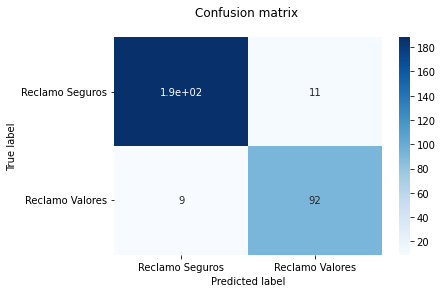

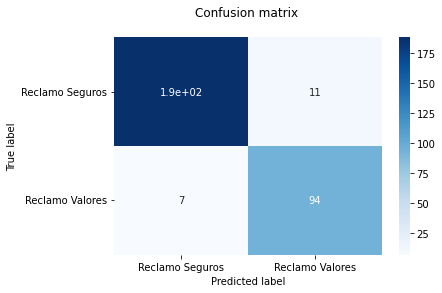

In [16]:
# EJECUTAR ESTE BLOQUE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred)

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=37,
                                                    stratify=y)

clf = DecisionTreeClassifier(random_state=20)
clf.fit(X_train, y_train)   

y_pred = clf.predict(X_test)  

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred)

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

**Respuesta:**

 * Bueno, en la diagonal pintada, vemos efectivamente los clasificados correctamente
 * En la diagonal blancca, vemos los incorrectos, podemos desde ya notar que ya que es una matriz de confusion con detalle de mapa de calor
 * Aca tambien podemos ver la razon de por que el recall era bajo

### Pregunta 7

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear.


In [7]:
# EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

# Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la
# funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold


Promedio Precision: 0.9269790469575294
Promedio Recall: 0.9291231010721793
Promedio F1-score: 0.9274416644972353
Promedio Accucary: 0.934939393939394


- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 5. Comente en qué difieren y por qué.
- ¿Qué beneficios tiene emplear cross-validation?



**Respuesta:**
* Bueno difieren por bastante poco, bien si parece haber maximizado un punto de equilibrio entre la precision y flexibilidad del modelo predictivo, esto debe ser por la capacidad del cross validate de ajustarse en gran escala a todo el data set utilizando 1:2 de los datos en validacion y construccion
* Creemos debe ser la usabilidad, mejora la probabilidad de que el modelo pueda ser usado en nuevos datos para la clasificacion con un margen de error aceptable